In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
color_platette = {
        'Task 1': {
            'learning_rate=0.01': '#1f77b4',   # 蓝色
            'learning_rate=0.05': '#ff7f0e',   # 橙色
            'learning_rate=0.2':  '#2ca02c',   # 绿色
            },
        'Task 2': {
            'Using Scheduler': '#d62728',      # 红色
            'Not Using Scheduler': '#9467bd',  # 紫色
            },
        'Task 3': {
            'weight_decay=1e-4': '#8c564b',    # 棕色
            'weight_decay=5e-4': '#e377c2',    # 粉色
        },
        'Task 4': {
            'all_relu': '#7f7f7f',                   # 灰色
            'sigmoid_at_4,5,6,7,8,9,10': '#17becf',  # 青色
        }
    }

def plot_train_loss_curves(train_loss_df,
                           task_ind,
                           save:bool = False,
                           save_dir:str = 'plots/'):
    """
    Plot training loss curves for each epoch.

    Args:
        train_loss_df (pd.DataFrame): DataFrame containing training loss data.
    """
    plt.figure(figsize=(10, 6))
    epochs = train_loss_df.index
    if task_ind == "Task 1":
        for lr in ['learning_rate=0.01', 'learning_rate=0.05', 'learning_rate=0.2']:
            plt.plot(epochs, train_loss_df[f'{lr}_mean'], label=f'{lr}', color=color_platette[task_ind][lr])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{lr}_min'],
                    train_loss_df[f'{lr}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][lr]
                    )
    elif task_ind == "Task 2":
        for scheduler in ['Using Scheduler', 'Not Using Scheduler']:
            plt.plot(epochs, train_loss_df[f'{scheduler}_mean'], label=f'{scheduler}', color=color_platette[task_ind][scheduler])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{scheduler}_min'],
                    train_loss_df[f'{scheduler}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][scheduler]
                    )
    elif task_ind == "Task 3":
        for weight_decay in ['weight_decay=1e-4', 'weight_decay=5e-4']:
            plt.plot(epochs, train_loss_df[f'{weight_decay}_mean'], label=f'{weight_decay}', color=color_platette[task_ind][weight_decay])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{weight_decay}_min'],
                    train_loss_df[f'{weight_decay}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][weight_decay]
                    )
    elif task_ind == "Task 4":
        for activation in ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']:
            plt.plot(epochs, train_loss_df[f'{activation}_mean'], label=f'{activation}', color=color_platette[task_ind][activation])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{activation}_min'],
                    train_loss_df[f'{activation}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][activation]
                    )

    # plt.title('Training Loss Curves of {}'.format(task_ind))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Train_Loss_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()
    plt.show()

def plot_val_loss_curves(val_loss_df,
                         task_ind,
                         save:bool = False,
                         save_dir:str = 'plots/'):
    """
    Plot validation loss curves for each epoch.
    Args:
        val_loss_df (pd.DataFrame): DataFrame containing validation loss data.
    """
    plt.figure(figsize=(10, 6))
    for col in val_loss_df.columns:
        plt.plot(val_loss_df[col], label=col, alpha=0.7, color=color_platette[task_ind][col])
    # plt.title('Validation Loss Curves of {}'.format(task_ind))
    plt.xlabel('Epochs')
    plt.xlim(1, len(val_loss_df))
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Val_Loss_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()


def plot_val_acc_curves(val_acc_df,
                        task_ind,
                        save:bool = False,
                        save_dir:str = 'plots/'):
    """
    Plot validation accuracy curves for each epoch.
    Args:
        val_acc_df (pd.DataFrame): DataFrame containing validation accuracy data.
    """
    plt.figure(figsize=(10, 6))
    for col in val_acc_df.columns:
        plt.plot(val_acc_df[col], label=col, alpha=0.7, color=color_platette[task_ind][col])
    # plt.title('Validation Accuracy Curves of {}'.format(task_ind))
    plt.xlabel('Epochs')
    plt.xlim(1, len(val_acc_df))
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Val_Acc_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

def plot_test_acc(test_accuracy_df,
                  task_ind,
                  save:bool = False,
                  save_dir:str = 'plots/'):
    """
    Plot test accuracy for each model.
    Args:
        test_accuracy_df (pd.DataFrame): DataFrame containing test accuracy data.
    """
    plt.figure(figsize=(8, 8))
    for col in test_accuracy_df.columns:
        plt.bar(col, test_accuracy_df[col].values[0], color=color_platette[task_ind][col])
    # plt.title('Test Accuracy of {}'.format(task_ind))
    # plt.xlabel('')
    # add value scaler
    for i, v in enumerate(test_accuracy_df.values[0]):
        plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom', fontsize=10)
    plt.ylabel('Accuracy')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Test_Acc.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

def plot_l2_norm(l2_norm_df,
                task_ind,
                save:bool = False,
                save_dir:str = 'plots/'):
    """
    Plot L2 norm for each model.
    Args:
        l2_norm_df (pd.DataFrame): DataFrame containing L2 norm data.
    """
    plt.figure(figsize=(10, 6))
    epochs = l2_norm_df.index
    for col in ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']:
        plt.plot(epochs, l2_norm_df[f'{col}_mean'], label=col, alpha=1, color=color_platette[task_ind][col])
        plt.fill_between(
                epochs,
                l2_norm_df[f'{col}_min'],
                l2_norm_df[f'{col}_max'],
                alpha=0.2,  # 设置区域透明度
                color=color_platette[task_ind][col]
                )
    # plt.title('L2 Norm of {}'.format(task_ind))
    plt.xlabel('Epochs')
    # plt.xlim(1, len(l2_norm_df))
    plt.ylabel('L2 Norm')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Train_l2_norm.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

# Task 1 - Learning rate

Identify 3 learning rate:

- 0.01
- 0.05
- 0.2

In [37]:
task1_train_loss_df = pd.read_csv('experiment_result/Task 1 - Train_loss_epoch.csv', index_col=0)
# task1_train_loss_df = task1_train_loss_df.iloc[:, [3, 4, 5, 9, 10, 11, 15, 16, 17]]
# task1_train_loss_df.columns = ['learning_rate=0.2_mean', 'learning_rate=0.2_min', 'learning_rate=0.2_max',
#                                'learning_rate=0.01_mean', 'learning_rate=0.01_min', 'learning_rate=0.01_max',
#                                'learning_rate=0.05_mean', 'learning_rate=0.05_min', 'learning_rate=0.05_max']
task1_val_loss_df = pd.read_csv('experiment_result/Task 1 - Val_Average Loss.csv', index_col=0)
task1_val_loss_df = task1_val_loss_df.iloc[:, [3, 9, 15]]
task1_val_loss_df.columns = ['learning_rate=0.2', 'learning_rate=0.01', 'learning_rate=0.05']
task1_val_accuracy_df = pd.read_csv('experiment_result/Task 1 - Val_Accuracy.csv', index_col=0)
task1_val_accuracy_df = task1_val_accuracy_df.iloc[:, [3, 9, 15]]
task1_val_accuracy_df.columns = ['learning_rate=0.2', 'learning_rate=0.01', 'learning_rate=0.05']
task1_test_accuracy_df = pd.read_csv('experiment_result/Task 1 - Test_Accuracy.csv')
task1_test_accuracy_df = task1_test_accuracy_df.iloc[:, [1, 4, 7]]
task1_test_accuracy_df.columns = ['learning_rate=0.2', 'learning_rate=0.01', 'learning_rate=0.05']

In [38]:
task1_train_loss_df

,mobilenet_Task LR_0.2_Friday_14_March_2025_20h_11m_20s - _step,mobilenet_Task LR_0.2_Friday_14_March_2025_20h_11m_20s - _step__MIN,mobilenet_Task LR_0.2_Friday_14_March_2025_20h_11m_20s - _step__MAX,mobilenet_Task LR_0.2_Friday_14_March_2025_20h_11m_20s - Train/loss,mobilenet_Task LR_0.2_Friday_14_March_2025_20h_11m_20s - Train/loss__MIN,mobilenet_Task LR_0.2_Friday_14_March_2025_20h_11m_20s - Train/loss__MAX,mobilenet_Task LR_0.01_Friday_14_March_2025_19h_08m_28s - _step,mobilenet_Task LR_0.01_Friday_14_March_2025_19h_08m_28s - _step__MIN,mobilenet_Task LR_0.01_Friday_14_March_2025_19h_08m_28s - _step__MAX,mobilenet_Task LR_0.01_Friday_14_March_2025_19h_08m_28s - Train/loss,mobilenet_Task LR_0.01_Friday_14_March_2025_19h_08m_28s - Train/loss__MIN,mobilenet_Task LR_0.01_Friday_14_March_2025_19h_08m_28s - Train/loss__MAX,mobilenet_Task LR_0.05_Friday_14_March_2025_18h_50m_38s - _step,mobilenet_Task LR_0.05_Friday_14_March_2025_18h_50m_38s - _step__MIN,mobilenet_Task LR_0.05_Friday_14_March_2025_18h_50m_38s - _step__MAX,mobilenet_Task LR_0.05_Friday_14_March_2025_18h_50m_38s - Train/loss,mobilenet_Task LR_0.05_Friday_14_March_2025_18h_50m_38s - Train/loss__MIN,mobilenet_Task LR_0.05_Friday_14_March_2025_18h_50m_38s - Train/loss__MAX
epoch,,,,,,,,,,,,,,,,,,
1,155.5,0,311,4.161547,3.716613,5.570866,155.5,0,311,4.268214,3.766005,4.699233,155.5,0,311,4.175772,3.639498,4.792540
2,468.5,313,624,3.693982,3.348587,4.092983,468.5,313,624,3.771274,3.437951,4.135299,468.5,313,624,3.663401,3.276120,4.084435
3,781.5,626,937,3.414066,2.970510,3.773453,781.5,626,937,3.500880,3.204422,3.926541,781.5,626,937,3.377114,2.967630,3.796530
4,1094.5,939,1250,3.182407,2.675378,3.547320,1094.5,939,1250,3.275535,2.880813,3.726854,1094.5,939,1250,3.152783,2.755538,3.626343
5,1407.5,1252,1563,2.984807,2.629689,3.373967,1407.5,1252,1563,3.088594,2.629230,3.576493,1407.5,1252,1563,2.950858,2.507101,3.325368
6,1720.5,1565,1876,2.804373,2.456009,3.246205,1720.5,1565,1876,2.922800,2.500612,3.304490,1720.5,1565,1876,2.782423,2.410333,3.260107
7,2033.5,1878,2189,2.627916,2.223056,2.987302,2033.5,1878,2189,2.783258,2.338399,3.265066,2033.5,1878,2189,2.606564,2.180624,3.146980
8,2346.5,2191,2502,2.516224,2.113608,2.914489,2346.5,2191,2502,2.645087,2.198149,3.182899,2346.5,2191,2502,2.459848,2.109916,2.912518
9,2659.5,2504,2815,2.390790,2.007745,2.817886,2659.5,2504,2815,2.529676,2.125633,2.882534,2659.5,2504,2815,2.316851,1.888588,2.726635


### plotting

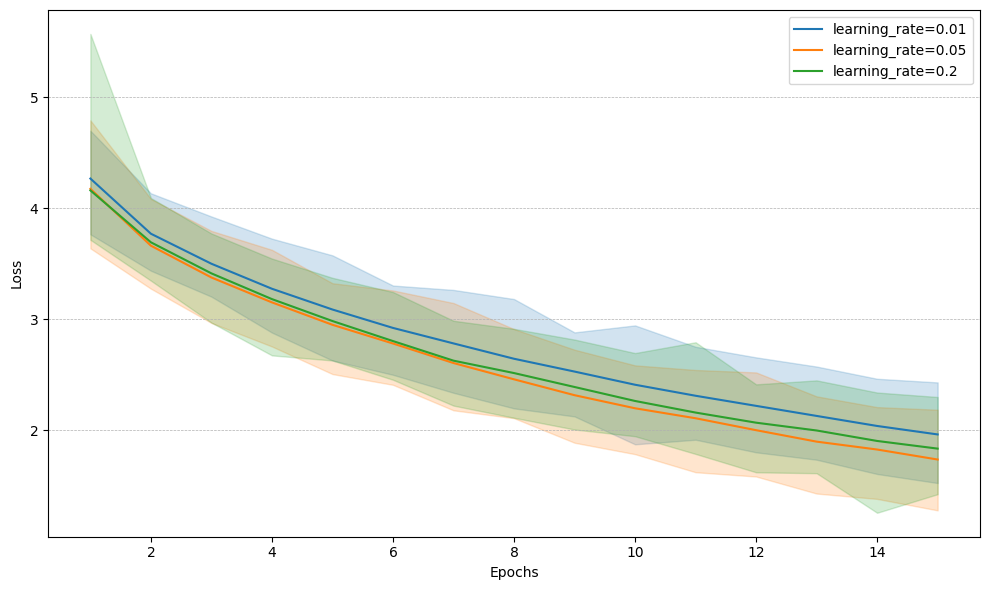

In [34]:
plot_train_loss_curves(task1_train_loss_df,
                       task_ind='Task 1',
                       save=True,
                       save_dir='plots/')

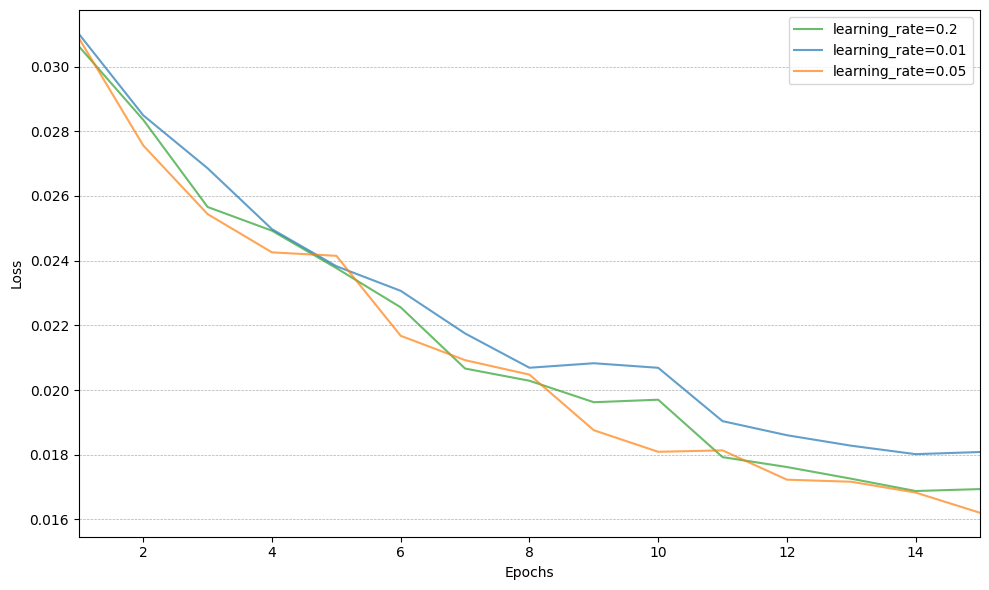

In [272]:
plot_val_loss_curves(task1_val_loss_df,
                     task_ind='Task 1',
                     save=True,
                     save_dir='plots/')

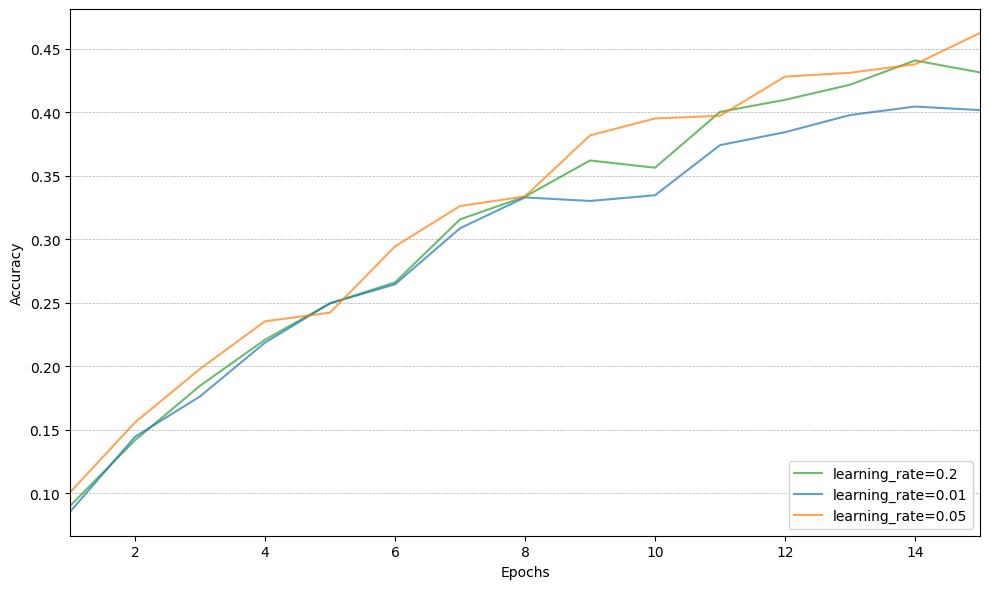

In [273]:
plot_val_acc_curves(task1_val_accuracy_df,
                   task_ind='Task 1',
                   save=True,
                   save_dir='plots/')

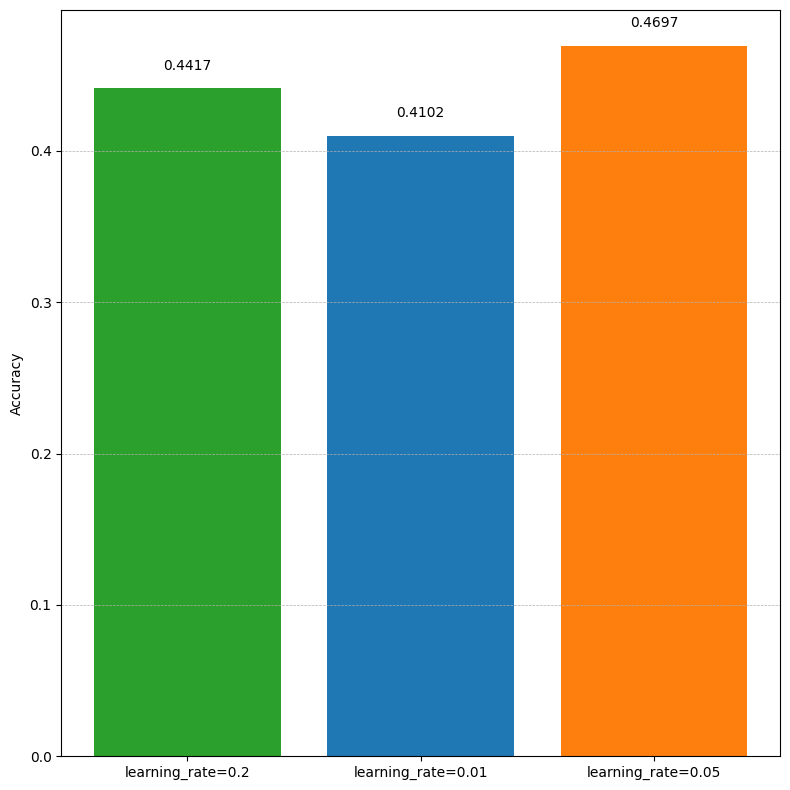

In [274]:
plot_test_acc(task1_test_accuracy_df,
              task_ind='Task 1',
              save=True,
              save_dir='plots/')

# Task 2 - Learning Rate Scheduler

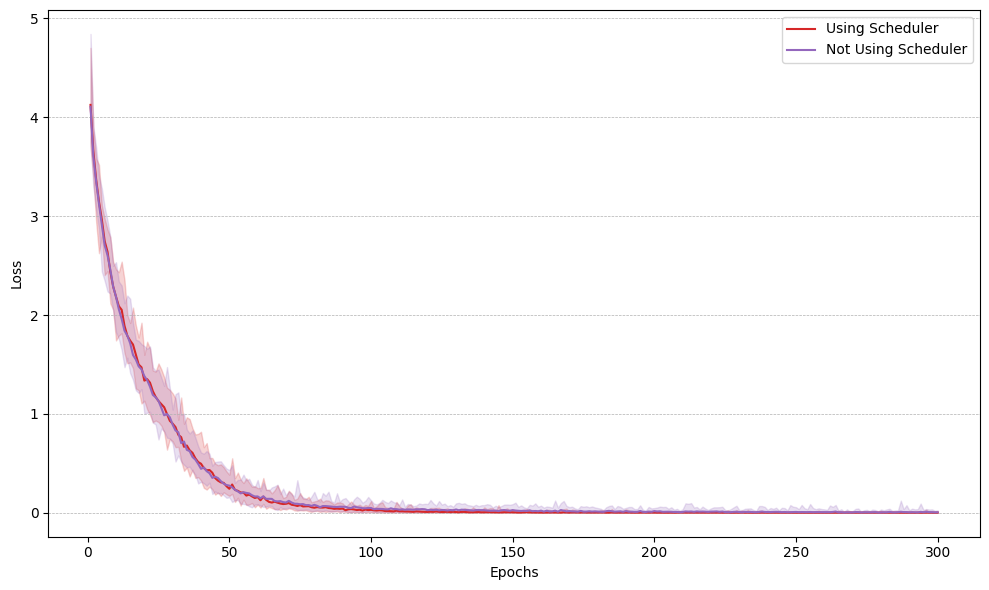

In [47]:
task2_train_loss_df = pd.read_csv('experiment_result/Task 2 - Train_loss_epoch.csv', index_col=0)
task2_train_loss_df = task2_train_loss_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task2_train_loss_df.columns = ['Using Scheduler_mean', 'Using Scheduler_min', 'Using Scheduler_max',
                               'Not Using Scheduler_mean', 'Not Using Scheduler_min', 'Not Using Scheduler_max']
plot_train_loss_curves(task2_train_loss_df,
                       task_ind='Task 2',
                       save=True,
                       save_dir='plots/')
# task2_train_loss_df

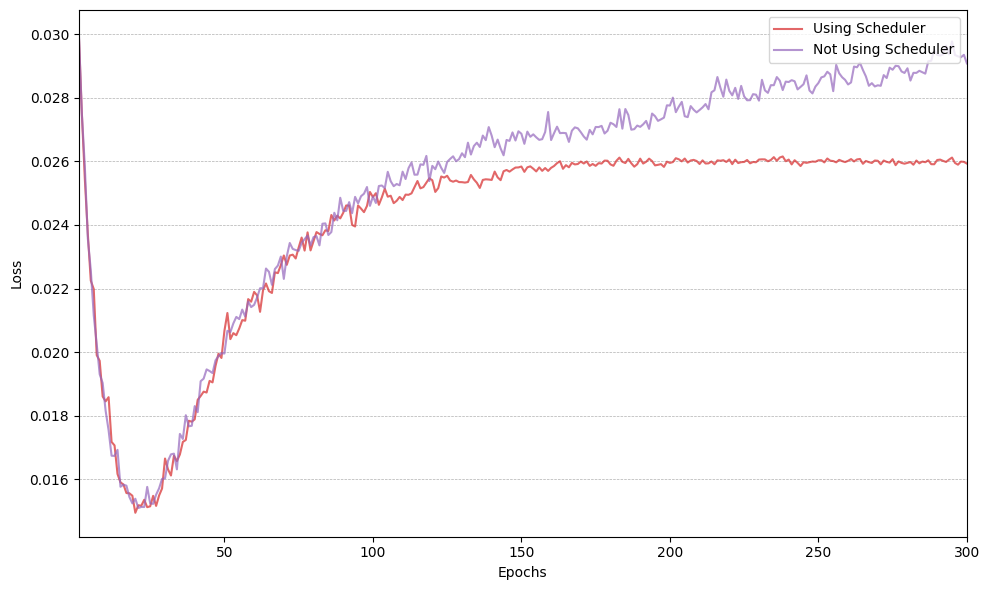

In [ ]:
task2_val_loss_df = pd.read_csv('experiment_result/Task 2 - Val_Average Loss.csv', index_col=0)
task2_val_loss_df = task2_val_loss_df.iloc[:, [3, 9]]
task2_val_loss_df.columns = ['Using Scheduler', 'Not Using Scheduler']
plot_val_loss_curves(task2_val_loss_df,
                     task_ind='Task 2',
                     save=True,
                     save_dir='plots/')

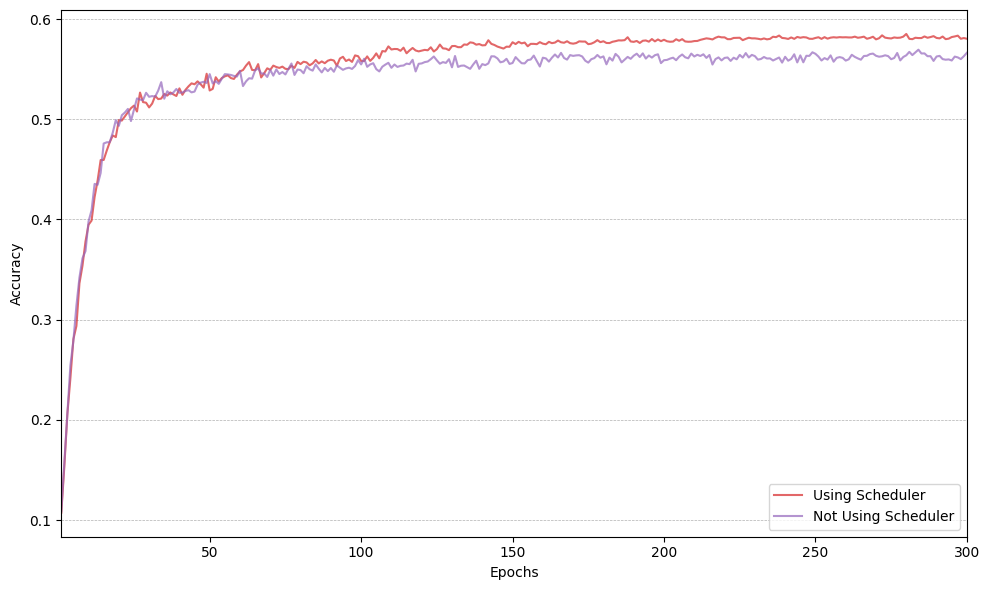

In [ ]:
task2_val_accuracy_df = pd.read_csv('experiment_result/Task 2 - Val_Accuracy.csv', index_col=0)
task2_val_accuracy_df = task2_val_accuracy_df.iloc[:, [3, 9]]
task2_val_accuracy_df.columns = ['Using Scheduler', 'Not Using Scheduler']
plot_val_acc_curves(task2_val_accuracy_df,
                   task_ind='Task 2',
                   save=True,
                   save_dir='plots/')

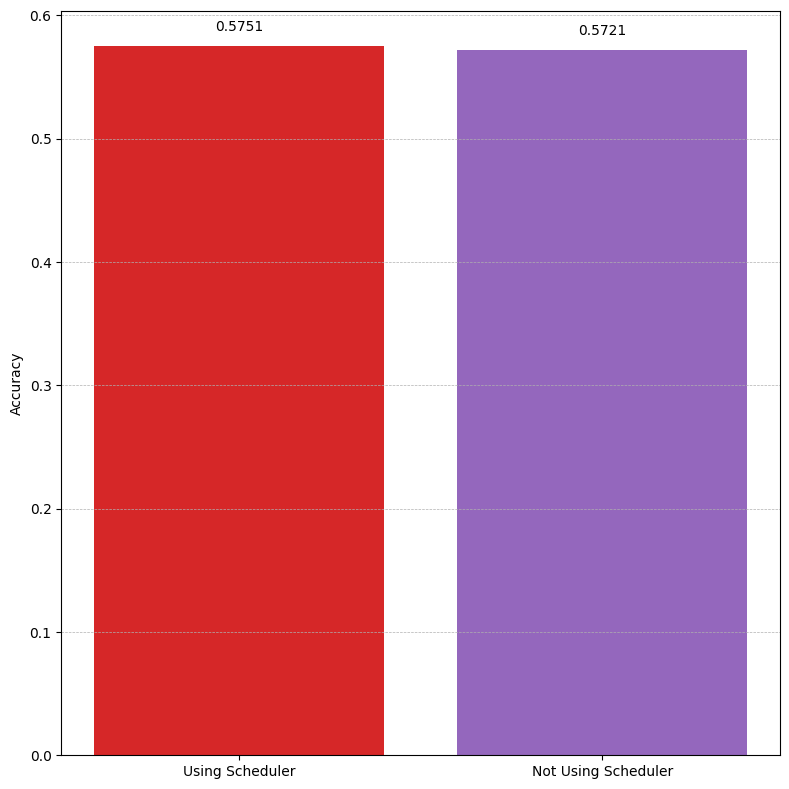

In [ ]:
task2_test_accuracy_df = pd.read_csv('experiment_result/Task 2 - Test_Accuracy.csv')
task2_test_accuracy_df = task2_test_accuracy_df.iloc[:, [1, 4]]
task2_test_accuracy_df.columns = ['Using Scheduler', 'Not Using Scheduler']
task2_test_accuracy_df.iloc[0,0] = task2_test_accuracy_df.iloc[1,0]
# task2_test_accuracy_df.iloc[1,0] = task2_test_accuracy_df.iloc[0,0]
task2_test_accuracy_df = task2_test_accuracy_df.iloc[[0]]
plot_test_acc(task2_test_accuracy_df,
              task_ind='Task 2',
              save=True,
              save_dir='plots/')

# Task 3 Weight Decay

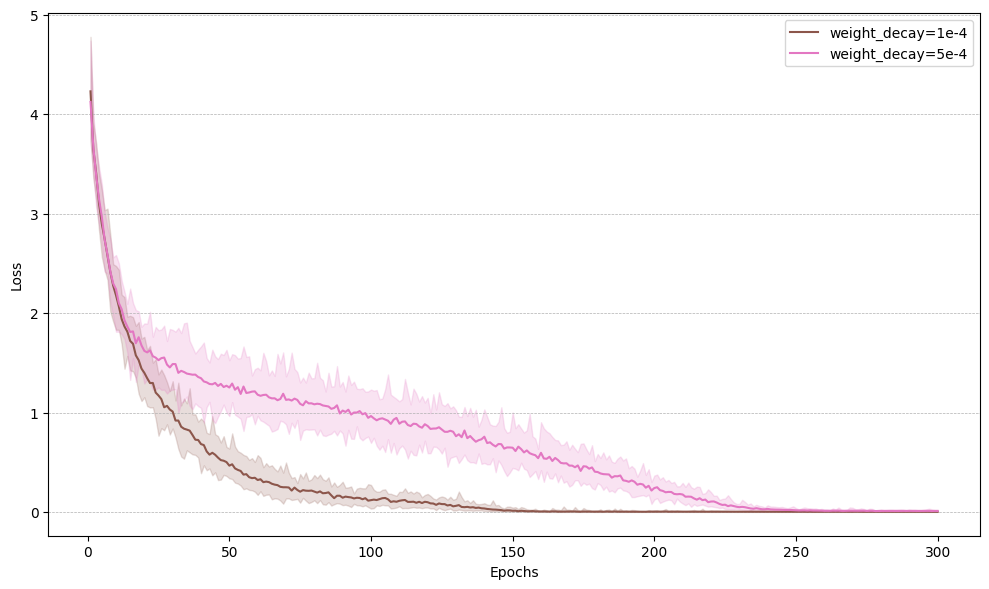

In [51]:
task3_train_loss_df = pd.read_csv('experiment_result/Task 3 - Train_loss_epoch.csv', index_col=0)
task3_train_loss_df = task3_train_loss_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task3_train_loss_df.columns = ['weight_decay=1e-4_mean', 'weight_decay=1e-4_min', 'weight_decay=1e-4_max',
                               'weight_decay=5e-4_mean', 'weight_decay=5e-4_min', 'weight_decay=5e-4_max']
plot_train_loss_curves(task3_train_loss_df,
                       task_ind='Task 3',
                       save=True,
                       save_dir='plots/')
# task3_train_loss_df

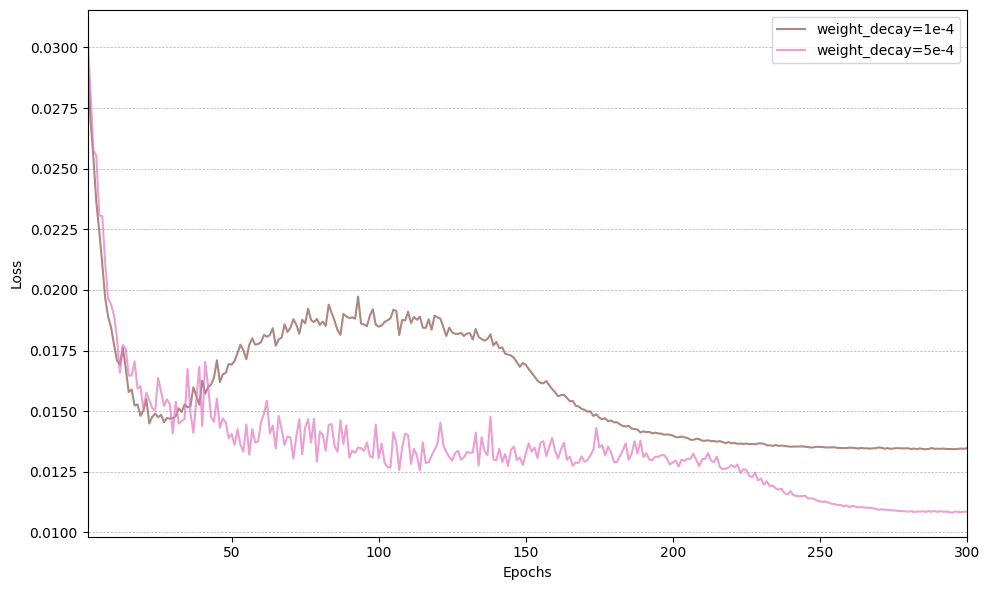

In [ ]:
task3_val_loss_df = pd.read_csv('experiment_result/Task 3 - Val_Average Loss.csv', index_col=0)
task3_val_loss_df = task3_val_loss_df.iloc[:, [3, 9]]
task3_val_loss_df.columns = ['weight_decay=1e-4', 'weight_decay=5e-4']
plot_val_loss_curves(task3_val_loss_df,
                     task_ind='Task 3',
                     save=True,
                     save_dir='plots/')

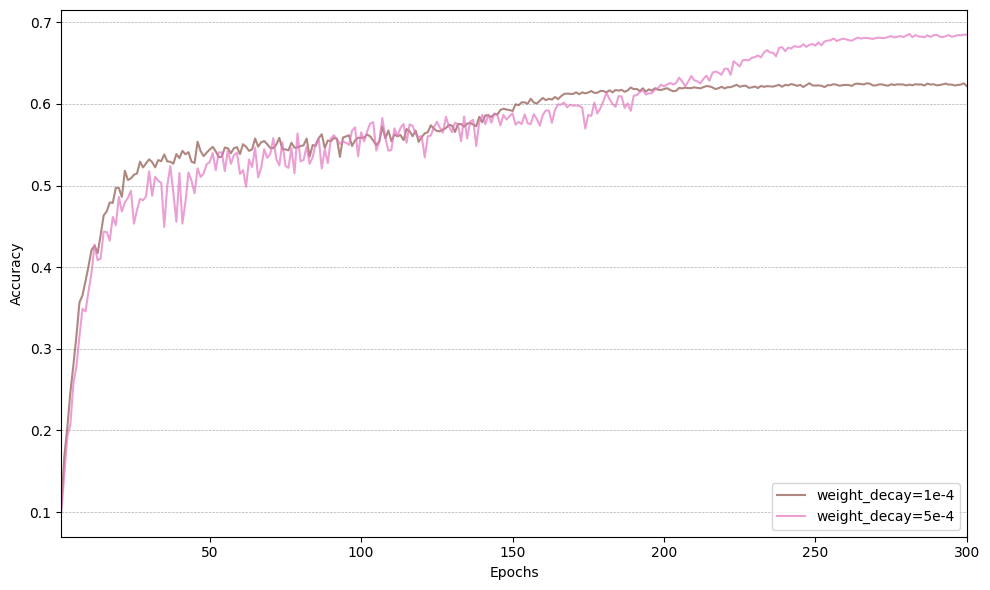

In [ ]:
task3_val_accuracy_df = pd.read_csv('experiment_result/Task 3 - Val_Accuracy.csv', index_col=0)
task3_val_accuracy_df = task3_val_accuracy_df.iloc[:, [3, 9]]
task3_val_accuracy_df.columns = ['weight_decay=1e-4', 'weight_decay=5e-4']
plot_val_acc_curves(task3_val_accuracy_df,
                   task_ind='Task 3',
                   save=True,
                   save_dir='plots/')

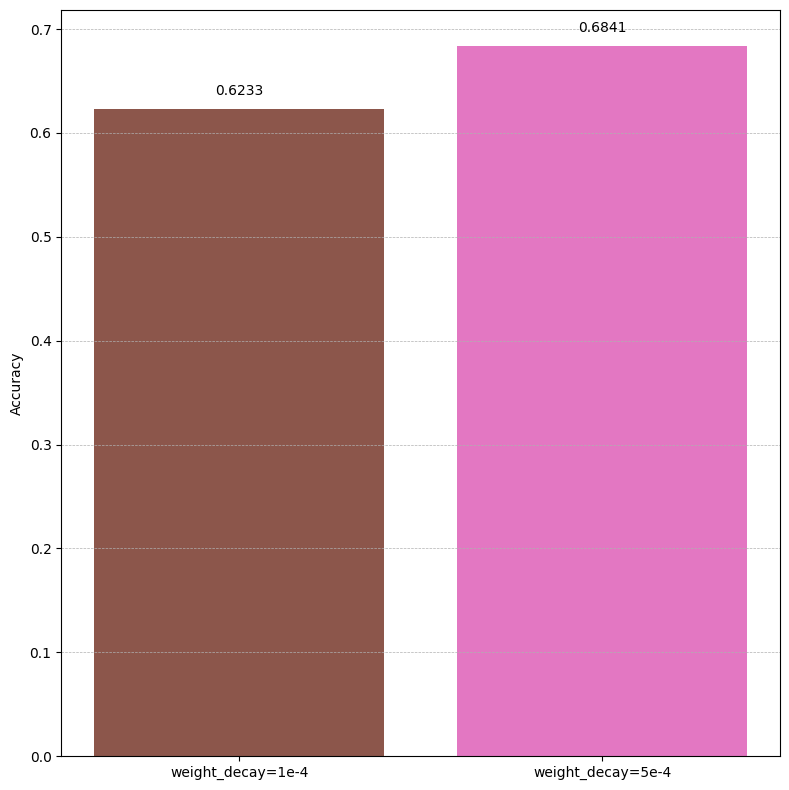

In [ ]:
task3_test_accuracy_df = pd.read_csv('experiment_result/Task 3 - Test_Accuracy.csv')
task3_test_accuracy_df = task3_test_accuracy_df.iloc[:, [1, 4]]
task3_test_accuracy_df.columns = ['weight_decay=1e-4', 'weight_decay=5e-4']
plot_test_acc(task3_test_accuracy_df,
              task_ind='Task 3',
              save=True,
              save_dir='plots/')

# Task 4 - Activation Function

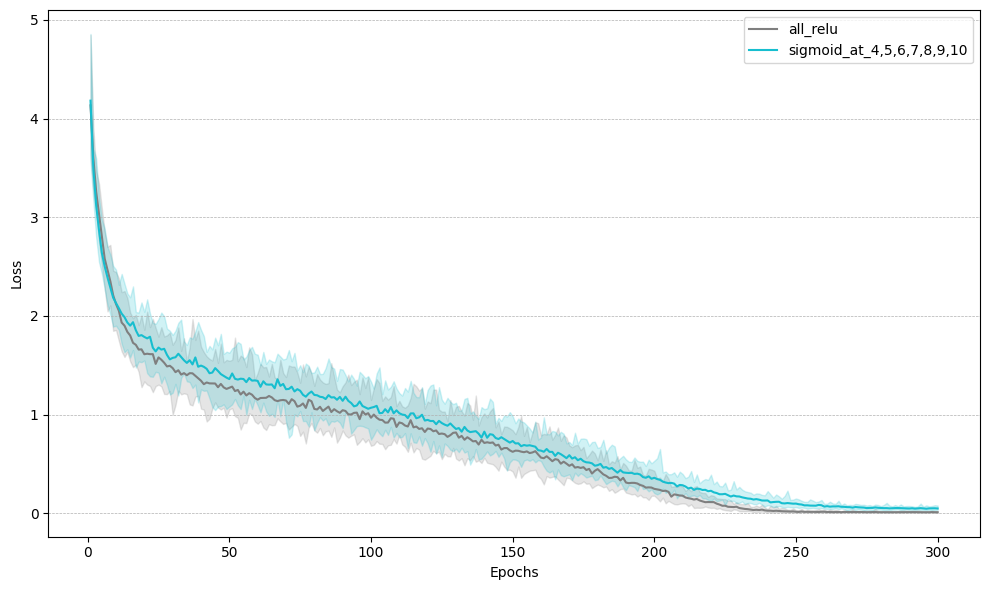

In [52]:
task4_train_loss_df = pd.read_csv('experiment_result/Task 4 - Train_loss_epoch.csv', index_col=0)
task4_train_loss_df = task4_train_loss_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task4_train_loss_df.columns = ['all_relu_mean', 'all_relu_min', 'all_relu_max',
                               'sigmoid_at_4,5,6,7,8,9,10_mean', 'sigmoid_at_4,5,6,7,8,9,10_min', 'sigmoid_at_4,5,6,7,8,9,10_max']
plot_train_loss_curves(task4_train_loss_df,
                       task_ind='Task 4',
                       save=True,
                       save_dir='plots/')

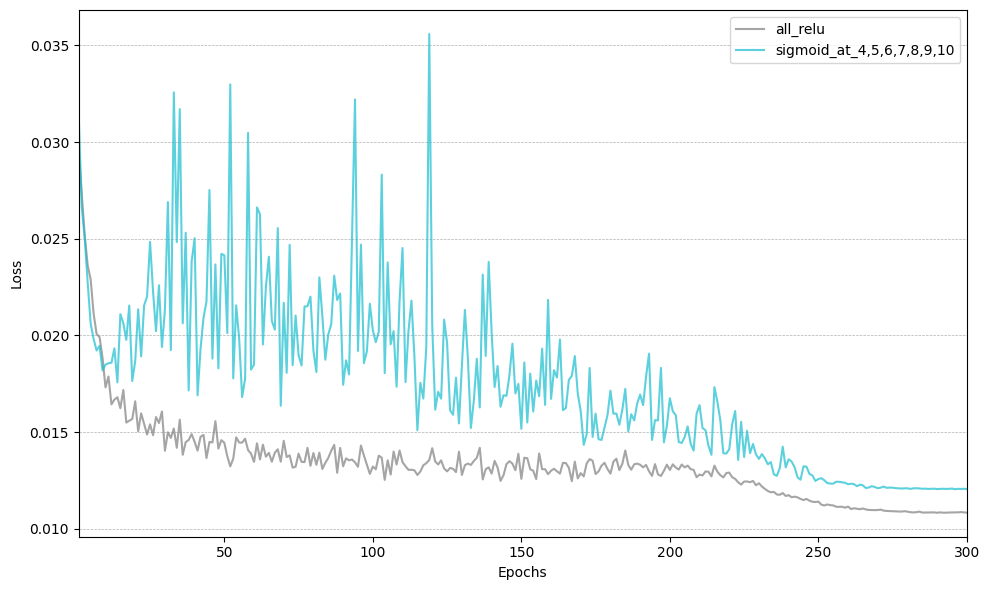

In [ ]:
task4_val_loss_df = pd.read_csv('experiment_result/Task 4 - Val_Average Loss.csv', index_col=0)
task4_val_loss_df = task4_val_loss_df.iloc[:, [3, 9]]
task4_val_loss_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_val_loss_curves(task4_val_loss_df,
                     task_ind='Task 4',
                     save=True,
                     save_dir='plots/')

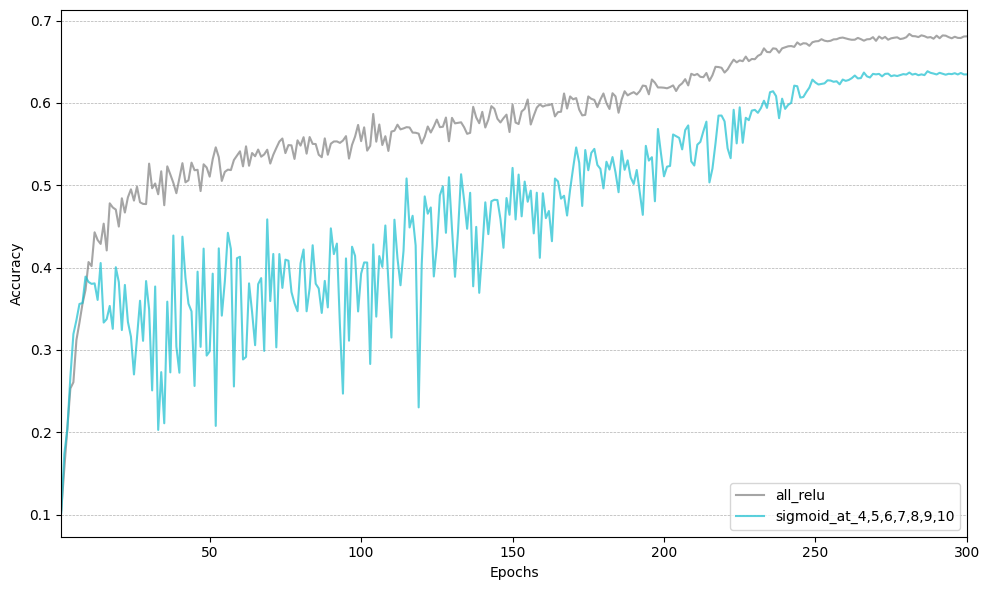

In [ ]:
task4_val_accuracy_df = pd.read_csv('experiment_result/Task 4 - Val_Accuracy.csv', index_col=0)
task4_val_accuracy_df = task4_val_accuracy_df.iloc[:, [3, 9]]
task4_val_accuracy_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_val_acc_curves(task4_val_accuracy_df,
                   task_ind='Task 4',
                   save=True,
                   save_dir='plots/')

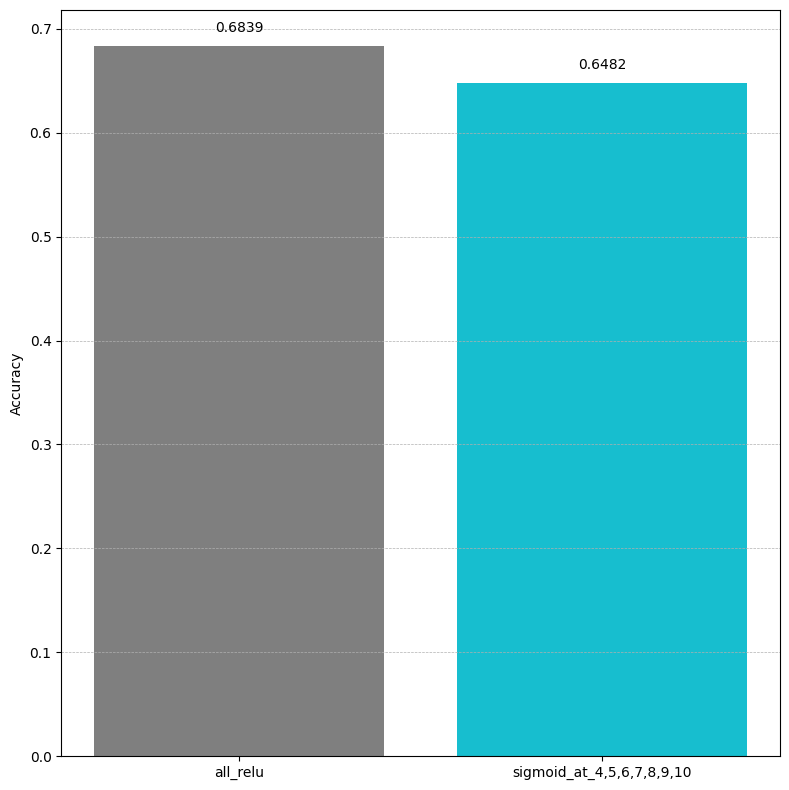

In [ ]:
task4_test_accuracy_df = pd.read_csv('experiment_result/Task 4 - Test_Accuracy.csv')
task4_test_accuracy_df = task4_test_accuracy_df.iloc[:, [1, 4]]
task4_test_accuracy_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_test_acc(task4_test_accuracy_df,
              task_ind='Task 4',
              save=True,
              save_dir='plots/')

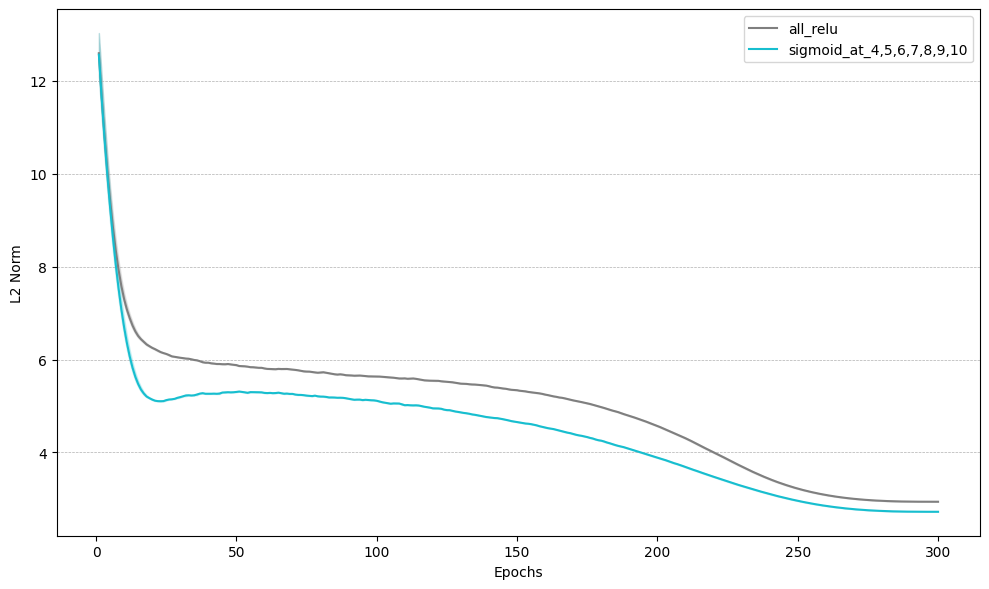

In [63]:
task4_train_l2_norm_df = pd.read_csv('experiment_result/Task 4 - Train_weight_norm.csv', index_col=0)
task4_train_l2_norm_df = task4_train_l2_norm_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task4_train_l2_norm_df.columns = ['all_relu_mean', 'all_relu_min', 'all_relu_max',
                                  'sigmoid_at_4,5,6,7,8,9,10_mean', 'sigmoid_at_4,5,6,7,8,9,10_min', 'sigmoid_at_4,5,6,7,8,9,10_max']
plot_l2_norm(task4_train_l2_norm_df,
                task_ind='Task 4',
                save=False,
                save_dir='plots/')
# task4_train_l2_norm_df

In [61]:
task4_train_l2_norm_df

,all_relu_mean,all_relu_min,all_relu_max,"sigmoid_at_4,5,6,7,8,9,10_mean","sigmoid_at_4,5,6,7,8,9,10_min","sigmoid_at_4,5,6,7,8,9,10_max"
epoch,,,,,,
1,12.592826,12.123473,13.023893,12.562035,12.083148,13.028780
2,11.676437,11.246251,12.120529,11.627382,11.187492,12.080150
3,10.842862,10.454896,11.243591,10.770409,10.368716,11.184745
4,10.093889,9.748295,10.452500,9.988161,9.621220,10.366213
5,9.430658,9.128769,9.746173,9.276082,8.944757,9.618929
...,...,...,...,...,...,...
296,2.939299,2.939220,2.939378,2.723245,2.723172,2.723317
297,2.939169,2.939119,2.939220,2.723126,2.723079,2.723172
298,2.939091,2.939062,2.939119,2.723053,2.723027,2.723079
